<img src="logo_UNSAM.jpg" align="right" width="150">

#### Análisis y Procesamiento de Señales

# **TS0 - Primeros pasos en la simulación**

### *Autora: Catalina Gonzalez Araujo*

# <u>**Introducción**</u>

En este primer trabajo comenzamos por diseñar un generador de señales que utilizaremos en las primeras simulaciones que hagamos.

Programamos e implementamos una funcion en Python para generar señales senoidales y que nos permita parametrizar:
- La amplitud maxima senoidal
- El valor medio de la amplitud
- La frecuencia de la señal
- La fase inicial
- El numero de muestras a generar
- La frecuencia de muestreo del sistema

# <u>**Desrrollo**</u>

Para el desarrollo de este trabajo (*TS0*), utilice un archivo proporcionado por la catedra sobre señales senoidales, [mi_senoidal](https://github.com/Catalina-git/APS/blob/main/Hola%20Mundo/mi_senoidal.py).

En primer lugar, se importaron las librerías necesarias para poder programar el código del trabajo: **NumPy**, para realizar cálculos numéricos y trabajar con vectores, y **Matplotlib**, para graficar la señal generada.  

La función `mi_funcion_sen` recibe los parámetros indicados en la introducción y sigue los siguientes pasos:

1. <font color=red><u> **Cálculo del periodo de muestreo** </u></font>

   Se calcula el tiempo que transcurre entre dos muestras consecutivas como: $Ts = \frac{1}{frecADC} $

   donde `frecADC` es la frecuencia de muestreo.

2. <font color=red><u> **Generación del vector de tiempo </u></font>(*`tt`*)**

   Se utiliza `np.arange` para crear un array que comienza en cero y avanza de a *Ts* pasos, hasta alcanzar *N* muestras.  
   Entonces, el vector *`tt`* (*eje x*) contiene los instantes de tiempo en los que se evaluará la señal.

3. <font color=red><u> **Cálculo de la señal </u></font> (*`xx`*)**  
   Para calcular la señal, utilicé la ecuación de la senoidal: $xx = \text{amplitud} \cdot \sin( 2 \pi \cdot frecuencia \cdot tt + fase ) + \text{offset}$

   donde...

- *`xx`*: valores de la amplitud de la señal senoidal generada, en *Volts*.  
- `amplitud`: amplitud máxima de la onda, en *Volts*.  
- `offset`: es mi amplitud media, en *Volts*.  
- `frecuencia`: es la frecuencia de la señal en *Hz*.  
- `fase`: desplazamiento inicial de la señal en *radianes*.  
- *`tt`*: vector de tiempo calculado en el paso anterior, en *segundos*.

4. <font color=red><u> **Resultados** </u></font> 

   Como resultado, la función devuelve dos vectores:  
- *`tt`*: vector tiempo (*eje x*).
- *`xx`*: vector amplitud de la señal (*eje y*).


In [1]:
 # Primero importo la libreria numpy
import numpy as np
import matplotlib.pyplot as plt

# Defino mi funcion
def mi_funcion_sen(amplitud = 1, offset = 0, frecuencia = 1, fase = 0, N = 1000, frecADC = 1000):
    """
    - amplitud: es la amplitud maxima. [amplitud] = [V]
    - offset: es mi amplitud media. [offset] = [V]
    - frecuencia: es la frecuencia de la señal. [frecuencia] = [Hz]
    - fase: es la fase inicial. [fase] = [rad]
    - N: es la cantidad de muestras a generar
    - frecADC: es la frecuencia de muestreo del ADC. [frecADC] = [Hz]
    """
    Ts = 1/frecADC # Es el tiempo en el cual se toma cada muestra

    tt = np.arange(start = 0, stop= N*Ts, step = Ts)

    xx = amplitud * np.sin(2 * np.pi * frecuencia * tt + fase) + offset

    return tt, xx

Finalmente, se eligieron aleatoriamente los valores de los parametros, se llamó a la función y se graficó el resultado de la señal senoidal, mostrando la forma de la onda generada.

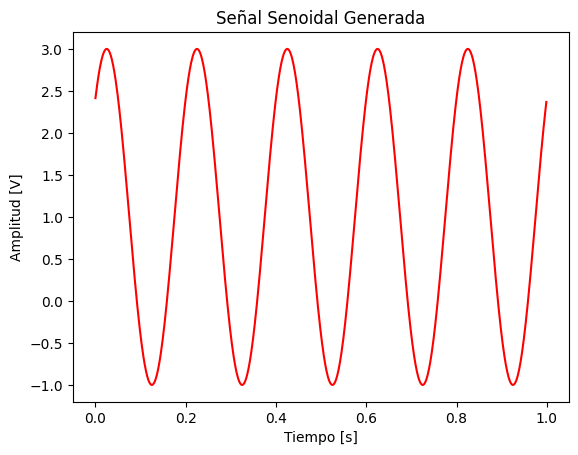

In [2]:
# Defino mis variables
amplitud = 2
offset = 1
frecuencia = 5
fase = np.pi/4
N = 1000
frecADC = 1000

# Llamo a mi funcion
tt, xx = mi_funcion_sen(amplitud, offset, frecuencia, fase, N, frecADC)

# Grafico la señal
plt.title("Señal Senoidal Generada")
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.plot(tt, xx, linestyle = '-', color = 'r' ) # Genero el grafico de la señal con linea 'continua' de color 'rojo'

# <u>**Ejercicio BONUS**</u>

En esta parte *bonus* del *TS0*, me pedían utilizar la misma función que me genera la señal senoidal (utilizada anteriormente), pero con los siguientes valores de frecuencia: 
- 500 *Hz*
- 999 *Hz*
- 1001 *Hz*
- 2001 *Hz*

Para realizarlo, emplee el mismo codigo que me genero la señal, pero cambiando los valores de frecuencia, y haciendo un gráfico por cada frecuencia, para luego poder comparar y analizar los resultados. 

Finalmente, me pedian que grafique alguna otra señal propia de un generador de señales. 

## <u>*Análisis de los gráficos del ejercicio bonus*</u>

Para poder observar los gráficos de cada una de las señales con los distintos valores de frecuencia que nos daban, tuve que adaptar, para cada caso, el valor de la frecuencia de muestreo, de lo contrario el gráfico eran figuras y no una onda. 

Busque información y encontre el teorema de **"Nyquist-Shannon"**, el cual establece la frecuencia mínima necesaria para muestrear una señal analógica y poder reconstruirla de forma precisa sin perder información, esta debe ser al menos el doble de la frecuencia máxima de la señal. 

De todas maneras, si pongo a la frecuencia de muestreo justo en el limite de Nyquist ($\text{frecADC} = 2 \cdot \text{frecuencia}$), ninguna señal se observa bien. 

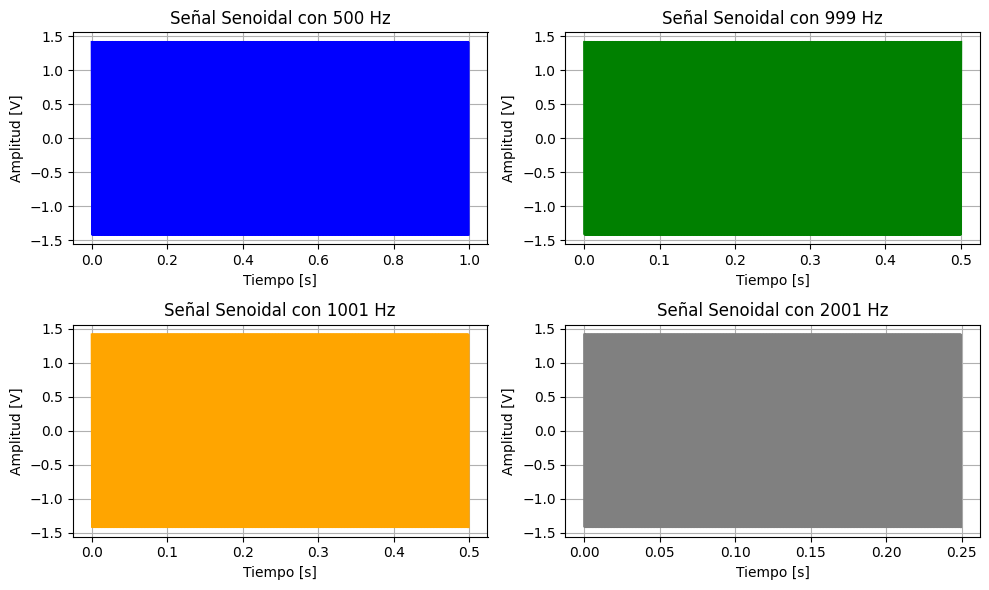

In [7]:
# EJERCICIO BONUS (SIGUIENDO EL TEOREMA DE NYQUIST-SHANNON)

# Defino mi funcion
def mi_funcion_sen(amplitud = 1, offset = 0, frecuencia = 1, fase = 0, N = 1000, frecADC = 1000):
    """
    - amplitud: es la amplitud maxima. [amplitud] = [V]
    - offset: es mi amplitud media. [offset] = [V]
    - frecuencia: es la frecuencia de la señal. [frecuencia] = [Hz]
    - fase: es la fase inicial. [fase] = [rad]
    - N: es la cantidad de muestras a generar
    - frecADC: es la frecuencia de muestreo del ADC. [frecADC] = [Hz]
    """
    Ts = 1/frecADC # Es el tiempo en el cual se toma cada muestra

    tt = np.arange(start = 0, stop= N*Ts, step = Ts)

    xx = amplitud * np.sin(2 * np.pi * frecuencia * tt + fase) + offset

    return tt, xx

# Genero otra ventana para los graficos
plt.figure(figsize=(10, 6))  # Tamaño de la figura (ancho, alto)

# Señal 500 Hz
plt.subplot(2, 2, 1)
tt, xx = mi_funcion_sen(2, 0, 500, np.pi/4, 1000, 1000)
plt.plot(tt, xx, '-', color='blue')
plt.title("Señal Senoidal con 500 Hz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)

# Señal 999 Hz
plt.subplot(2, 2, 2)
tt, xx = mi_funcion_sen(2, 0, 999, np.pi/4, 1000, 1998)
plt.plot(tt, xx, '-', color='green')
plt.title("Señal Senoidal con 999 Hz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)

# Señal 1001 Hz
plt.subplot(2, 2, 3)
tt, xx = mi_funcion_sen(2, 0, 1001, np.pi/4, 1000, 2002)
plt.plot(tt, xx, '-', color='orange')
plt.title("Señal Senoidal con 1001 Hz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)

# Señal 2001 Hz
plt.subplot(2, 2, 4)
tt, xx = mi_funcion_sen(2, 0, 2001, np.pi/4, 1000, 4002)
plt.plot(tt, xx, '-', color='grey')
plt.title("Señal Senoidal con 2001 Hz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)

plt.tight_layout()  
plt.show()

Entonces tuve que adaptar la frecuencia de muestreo para que todas tengan un valor mucho mas superior que el doble de la frecuencia, y de esta manera, pude apreciar los cuatro gráficos de la señal.

En todos los casos usé la misma cantidad de muestras (*`N`*), la misma *`amplitud`*, mismo *`offset`* (amplitud media) y *`fase`* que para el primer ejercicio del trabajo, lo unico que modifique fue la *`frecuencia`* y la *`frecADC`* (frecuencia de muestreo).

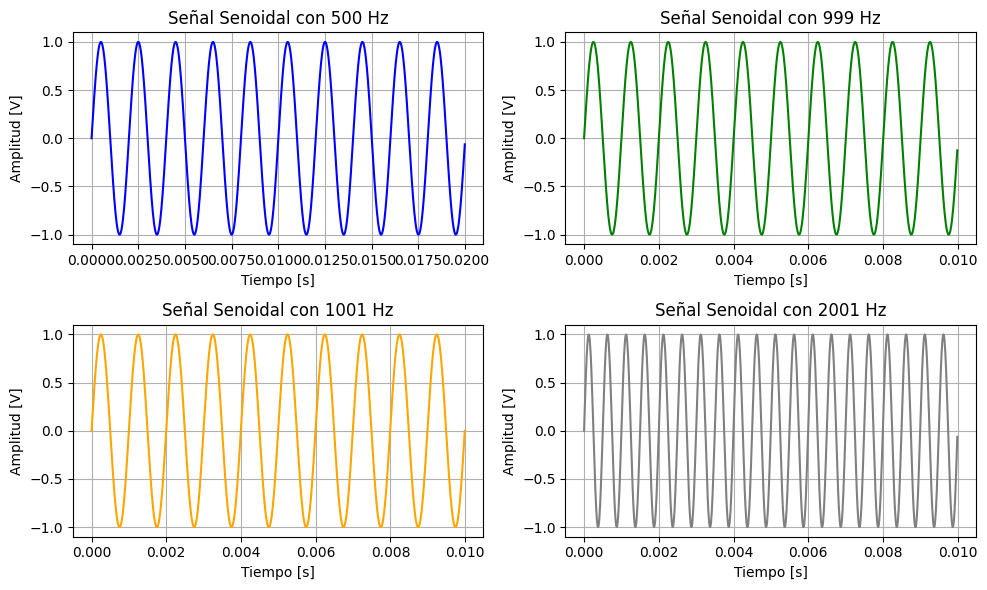

In [6]:
# --------------------------------------- EJERCICIO BONUS --------------------------------------- 

# --------------------------------------- ITEM 1 ---------------------------------------
# Genero otra ventana para los graficos
plt.figure(figsize=(10, 6))  # Tamaño de la figura (ancho, alto)

# Señal 500 Hz, es Nyquist
plt.subplot(2, 2, 1)
tt, xx = mi_funcion_sen(1, 0, 500, 0, 1000, 50000)
plt.plot(tt, xx, '-', color='blue')
plt.title("Señal Senoidal con 500 Hz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)

# Señal 999 Hz
plt.subplot(2, 2, 2)
tt, xx = mi_funcion_sen(1, 0, 999, 0, 1000, 100000)
plt.plot(tt, xx, '-', color='green')
plt.title("Señal Senoidal con 999 Hz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)

# Señal 1001 Hz
plt.subplot(2, 2, 3)
tt, xx = mi_funcion_sen(1, 0, 1001, 0, 1000, 100000)
plt.plot(tt, xx, '-', color='orange')
plt.title("Señal Senoidal con 1001 Hz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)

# Señal 2001 Hz
plt.subplot(2, 2, 4)
tt, xx = mi_funcion_sen(1, 0, 2001, 0, 1000, 100000)
plt.plot(tt, xx, '-', color='grey')
plt.title("Señal Senoidal con 2001 Hz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)

plt.tight_layout()  
plt.show()



- Señal con *`500 Hz`* de frecuencia y *`50000 Hz`* de frecuencia de muestreo

- Señal con *`999 Hz`*, *`1001 Hz`* y *`2001 Hz`*, todas con una frecuencia de muestreo de *`100000 Hz`*
  
  En cada una, la frecuencia de muestreo es muy alta en comparación con la frecuencia de la señal, es decir que se cumple el teorema de Nyquist-Shannon, por lo que la señal se ve suave y continua.

Para terminar de entender este análisis me ayude con una inteligencia artificial (*Copilot*), y lo que pude concluir es que la función `mi_funcion_sen` me genera la señal directamente en el dominio continuo y luego la muestrea, por lo que no se produce *aliasing* (efecto visual que ocurre cuando una señal continua se muestrea o digitaliza a una tasa insuficiente) en los gráficos. Sin embargo, en sistemas reales, este fenomeno si se manifiesta y puede distorcionar completamente la informacion, por lo que es fundamental aplicar el teorema de *Nyquist*. De todas maneras, siento que me quedaron ideas inconclusas sobre este teorema y que es lo que sucede con estos cuatro gráficos. 

Para concluir con el ejercicio *BONUS*, grafique una señal cuadrada utilizando [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sweep_poly.html#scipy.signal.sweep_poly)

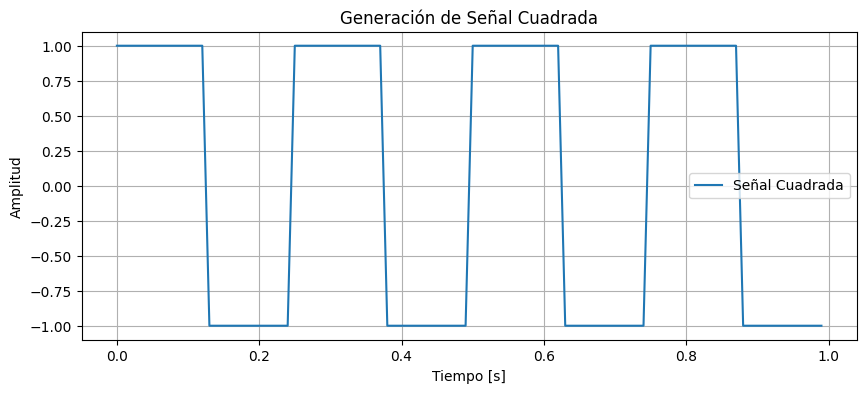

In [5]:
# Grafico una señal cuadrada
# Primero importo la libreria numpy
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def mi_funcion_cuadrada (frecuencia, frecADC, N, offset, fase):
    Ts = 1/frecADC # Es el tiempo en el cual se toma cada muestra

    ttc = np.arange(start = 0, stop= N*Ts, step = Ts)

    xxc = signal.square(2 * np.pi * frecuencia * ttc + fase) + offset

    return ttc, xxc
    
# Defino mis variables
N = 100
offset = 0
frecuencia = 4
fase = 0
frecADC = 100

# Llamo a mi funcion
ttc, xxc = mi_funcion_cuadrada(frecuencia, frecADC, N, offset, fase)

# Graficamos la señal cuadrada generada
plt.figure(figsize=(10, 4))
plt.plot(ttc, xxc, label='Señal Cuadrada')
plt.title('Generación de Señal Cuadrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()

# <u>**Conclusión**</u>

En conclusión, este trabajo me ayudo a refrescar contenidos previos, y me sirvió para empezar a aprender y a familiarizarme con los temas de la materia. 

En un principio se me dificultó entender que era lo que me pedía la consigna, y algunos parametros que se utilizaron en las ecuaciones (como calcularlos, que era cada uno, etc.), pero con el trabajo en grupo con mis compañeros, y la ayuda de la inteligencia artificial (*ChatGPT* y *Copilot*), pude terminar de comprender la consigna, y algunos conceptos teóricos.

Me entusiasmó esta materia porque voy a ver cosas mas relacionadas a la carrera que estoy estudiando (Ingeniería Biomédica). Espero poder aprender a analizar señales, y poder entender y comprender que es lo que significa cada una de las señales que veamos. 
